<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/Final/clustering_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv("/content/report.csv")

# Calculate the average temperature_2m for each distinct combination of longitude and latitude
result = data.groupby(["longitude", "latitude"])["temperature_2m", "total_precipitation_sum"].mean().reset_index()

# Save the result to a new CSV file
result

<ipython-input-143-32ddcf57cd6f>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = data.groupby(["longitude", "latitude"])["temperature_2m", "total_precipitation_sum"].mean().reset_index()


,longitude,latitude,temperature_2m,total_precipitation_sum
0,-121.766637,38.402978,288.772564,0.062988
1,-121.766637,38.492810,289.114824,0.061752
2,-121.766637,38.582641,289.464351,0.060356
3,-121.766637,38.672473,289.656883,0.059890
4,-121.676805,38.133484,288.286559,0.056141
...,...,...,...,...
93,-120.598827,38.762305,284.601908,0.145645
94,-120.598827,38.852136,283.766286,0.149048
95,-120.508995,38.313147,285.719850,0.127688
96,-120.508995,38.402978,285.294950,0.132672


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
result[["temperature_2m", "total_precipitation_sum"]] = scaler.fit_transform(result[["temperature_2m", "total_precipitation_sum"]])

In [145]:
result

,longitude,latitude,temperature_2m,total_precipitation_sum
0,-121.766637,38.402978,0.849876,0.073690
1,-121.766637,38.492810,0.907979,0.060385
2,-121.766637,38.582641,0.967315,0.045366
3,-121.766637,38.672473,1.000000,0.040346
4,-121.676805,38.133484,0.767371,0.000000
...,...,...,...,...
93,-120.598827,38.762305,0.141857,0.963372
94,-120.598827,38.852136,0.000000,1.000000
95,-120.508995,38.313147,0.331641,0.770090
96,-120.508995,38.402978,0.259509,0.823736


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



In [147]:
kmeans = KMeans(init="random", n_clusters=4, random_state=0)
kmeans.fit(result[["temperature_2m", "total_precipitation_sum"]])
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


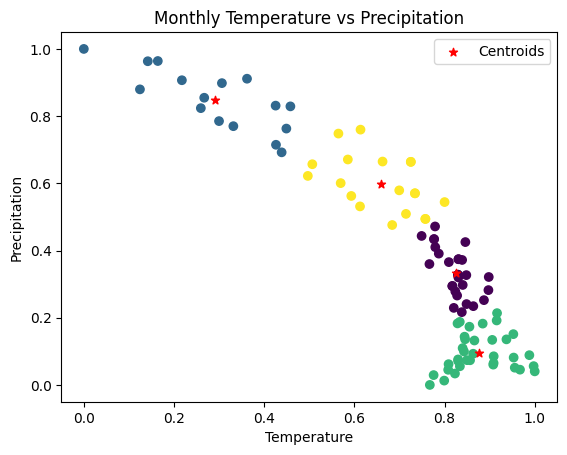

In [148]:
# Plot the scatter plot with centroid points
fig, ax = plt.subplots(1, 1)
ax.scatter(result["temperature_2m"], result["total_precipitation_sum"], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*', label='Centroids')
ax.set_title("Monthly Temperature vs Precipitation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Precipitation")
ax.legend()

In [149]:
result["cluster"] = kmeans.labels_
result

,longitude,latitude,temperature_2m,total_precipitation_sum,cluster
0,-121.766637,38.402978,0.849876,0.073690,2
1,-121.766637,38.492810,0.907979,0.060385,2
2,-121.766637,38.582641,0.967315,0.045366,2
3,-121.766637,38.672473,1.000000,0.040346,2
4,-121.676805,38.133484,0.767371,0.000000,2
...,...,...,...,...,...
93,-120.598827,38.762305,0.141857,0.963372,1
94,-120.598827,38.852136,0.000000,1.000000,1
95,-120.508995,38.313147,0.331641,0.770090,1
96,-120.508995,38.402978,0.259509,0.823736,1


In [150]:
print("Cluster values:", result["cluster"].unique())

Cluster values: [2 0 3 1]


In [151]:
import folium
from folium.plugins import MarkerCluster
# Create a new map centered at the mean latitude and longitude of the data
map_center = [result["latitude"].mean(), result["longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add a marker for each data point
for _, row in result.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]], icon=folium.Icon(color="blue")).add_to(m)

# Add a marker for each cluster center
for cluster in set(result["cluster"]):
    cluster_data = result[result["cluster"] == cluster]
    cluster_center = [cluster_data["latitude"].mean(), cluster_data["longitude"].mean()]
    folium.Marker(location=cluster_center, icon=folium.Icon(color="red")).add_to(m)

# Display the map
m

In [152]:
import folium

# Create a map centered around a specific latitude and longitude
map_center = [38.5, -121.5]
m = folium.Map(location=map_center, zoom_start=10)

# Iterate over your data and add markers to the map
for index, row in result.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    cluster = row['cluster']

    # Define the marker color based on the cluster
    if cluster == 1:
        color = 'blue'
    elif cluster == 2:
        color = 'red'
    elif cluster == 3:
        color = 'yellow'
    else:
        color = 'green'

    # Add a marker to the map
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Display the map
m


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

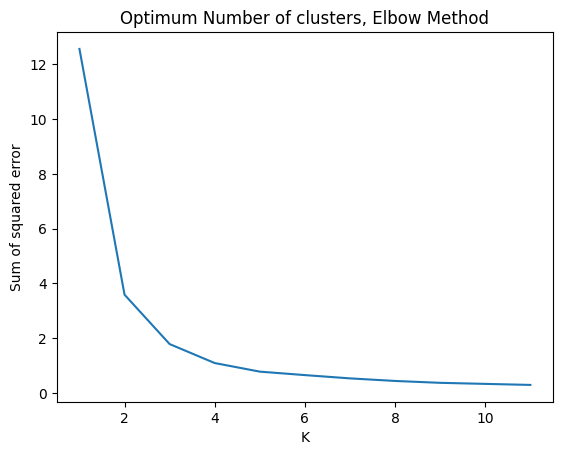

In [153]:
k_rng = range (1, 12)
sse =[]
for k in k_rng:
  km=KMeans(init="random", n_clusters=k, random_state=0)
  km.fit(result[["temperature_2m", "total_precipitation_sum"]])
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title("Optimum Number of clusters, Elbow Method")
plt.plot(k_rng,sse)

In [154]:

from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score((result[["temperature_2m", "total_precipitation_sum"]]), labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5096565625775562


In [155]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Perform K-means clustering with varying hyperparameters
num_clusters = [3, 4, 5,6]  # Vary the number of clusters
init_methods = ['random', 'k-means++']  # Vary the initialization method

best_model = None
best_score = -1

for n in num_clusters:
    for init in init_methods:
        kmeans = KMeans(n_clusters=n, init=init, random_state=0)
        kmeans.fit(result[["temperature_2m", "total_precipitation_sum"]])
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(result, labels)
        print("Number of clusters:", n)
        print("Initialization method:", init)
        print("Silhouette Score:", silhouette_avg)
        print()

        # Check if this model has a higher silhouette score than the previous best
        if silhouette_avg > best_score:
            best_model = kmeans
            best_score = silhouette_avg

print("Best Model:")
print(best_model)
print("Best Silhouette Score:", best_score)


Number of clusters: 3
Initialization method: random
Silhouette Score: 0.2937387976493419

Number of clusters: 3
Initialization method: k-means++
Silhouette Score: 0.29673391219643

Number of clusters: 4
Initialization method: random
Silhouette Score: 0.7719386277444661

Number of clusters: 4
Initialization method: k-means++
Silhouette Score: 0.7719386277444661

Number of clusters: 5
Initialization method: random
Silhouette Score: 0.5010814993400083

Number of clusters: 5
Initialization method: k-means++
Silhouette Score: 0.47476564509042163

Number of clusters: 6
Initialization method: random
Silhouette Score: 0.2741668409122063

Number of clusters: 6
Initialization method: k-means++
Silhouette Score: 0.28891854040776593

Best Model:
KMeans(init='random', n_clusters=4, random_state=0)
Best Silhouette Score: 0.7719386277444661


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

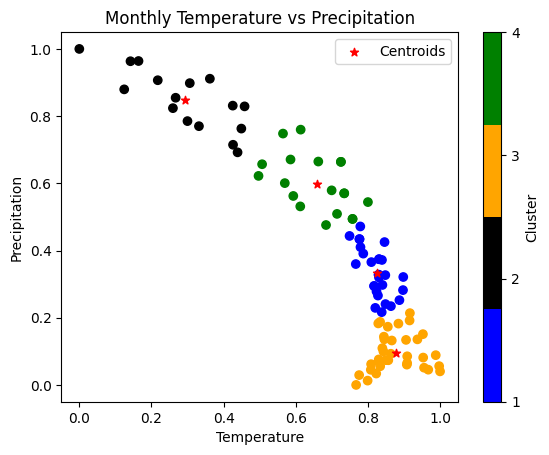

In [156]:
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as mcolors

# Define cluster colors
cluster_colors = ['blue', 'black', 'orange','green']  # Add more colors if needed

# Scatter plot
fig, ax = plt.subplots(1, 1)
scatter = ax.scatter(result["temperature_2m"], result["total_precipitation_sum"], c=result['cluster'], cmap=mcolors.ListedColormap(cluster_colors))
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*', label='Centroids')
ax.set_title("Monthly Temperature vs Precipitation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Precipitation")
ax.legend()

# Colorbar
cbar = plt.colorbar(scatter, ticks=range(len(cluster_colors)))
cbar.set_label('Cluster')
cbar.set_ticklabels(range(1, len(cluster_colors)+1))

# Create a map centered around a specific latitude and longitude
map_center = [38.5, -121.5]
m = folium.Map(location=map_center, zoom_start=10)

# Iterate over your data and add markers to the map
for index, row in result.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    cluster = int(row['cluster'])  # Convert cluster value to integer

    # Define the marker color based on the cluster
    if cluster >= 0 and cluster < len(cluster_colors):
        color = mcolors.rgb2hex(mcolors.to_rgb(cluster_colors[cluster]))
    else:
        color = 'gray'

    # Add a marker to the map
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Display the map
m


In [158]:
cluster_4_rows = result[result['cluster'] == 1]
print(cluster_4_rows)


     longitude   latitude  temperature_2m  total_precipitation_sum  cluster
79 -120.778490  38.762305        0.458130                 0.829027        1
80 -120.778490  38.852136        0.361910                 0.911320        1
83 -120.688658  38.492810        0.438705                 0.692238        1
84 -120.688658  38.582641        0.449164                 0.762926        1
85 -120.688658  38.672473        0.425371                 0.831247        1
86 -120.688658  38.762305        0.306256                 0.898203        1
87 -120.688658  38.852136        0.164089                 0.964023        1
89 -120.598827  38.402978        0.426162                 0.714725        1
90 -120.598827  38.492810        0.299844                 0.785194        1
91 -120.598827  38.582641        0.267013                 0.854693        1
92 -120.598827  38.672473        0.217477                 0.906828        1
93 -120.598827  38.762305        0.141857                 0.963372        1
94 -120.5988

In [159]:
from scipy.spatial.distance import euclidean
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cl = cluster.fit_predict(result[["temperature_2m", "total_precipitation_sum"]])
cl

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [160]:
from sklearn.metrics import silhouette_score
silhouette_score(result[["temperature_2m", "total_precipitation_sum"]],cl)

0.5073892827475066

In [161]:
unique_cl = np.unique(cl)
unique_cl

array([0, 1, 2])

In [165]:
result_without_cluster = result.drop('cluster', axis=1)
print(result_without_cluster)
result = result_without_cluster

     longitude   latitude  temperature_2m  total_precipitation_sum
0  -121.766637  38.402978        0.849876                 0.073690
1  -121.766637  38.492810        0.907979                 0.060385
2  -121.766637  38.582641        0.967315                 0.045366
3  -121.766637  38.672473        1.000000                 0.040346
4  -121.676805  38.133484        0.767371                 0.000000
..         ...        ...             ...                      ...
93 -120.598827  38.762305        0.141857                 0.963372
94 -120.598827  38.852136        0.000000                 1.000000
95 -120.508995  38.313147        0.331641                 0.770090
96 -120.508995  38.402978        0.259509                 0.823736
97 -120.508995  38.492810        0.124464                 0.879661

[98 rows x 4 columns]


In [166]:
result['cluster'] = cl
result


,longitude,latitude,temperature_2m,total_precipitation_sum,cluster
0,-121.766637,38.402978,0.849876,0.073690,2
1,-121.766637,38.492810,0.907979,0.060385,2
2,-121.766637,38.582641,0.967315,0.045366,2
3,-121.766637,38.672473,1.000000,0.040346,2
4,-121.676805,38.133484,0.767371,0.000000,2
...,...,...,...,...,...
93,-120.598827,38.762305,0.141857,0.963372,0
94,-120.598827,38.852136,0.000000,1.000000,0
95,-120.508995,38.313147,0.331641,0.770090,0
96,-120.508995,38.402978,0.259509,0.823736,0


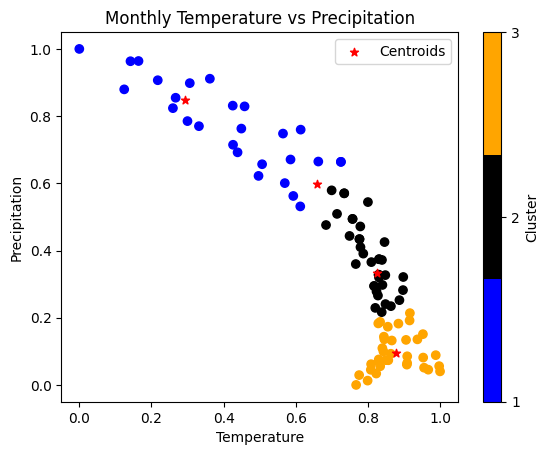

In [167]:
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as mcolors

# Define cluster colors
cluster_colors = ['blue', 'black', 'orange']  # Add more colors if needed

# Scatter plot
fig, ax = plt.subplots(1, 1)
scatter = ax.scatter(result["temperature_2m"], result["total_precipitation_sum"], c=result['cluster'], cmap=mcolors.ListedColormap(cluster_colors))
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*', label='Centroids')
ax.set_title("Monthly Temperature vs Precipitation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Precipitation")
ax.legend()

# Colorbar
cbar = plt.colorbar(scatter, ticks=range(len(cluster_colors)))
cbar.set_label('Cluster')
cbar.set_ticklabels(range(1, len(cluster_colors)+1))

# Create a map centered around a specific latitude and longitude
map_center = [38.5, -121.5]
m = folium.Map(location=map_center, zoom_start=10)

# Iterate over your data and add markers to the map
for index, row in result.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    cluster = int(row['cluster'])  # Convert cluster value to integer

    # Define the marker color based on the cluster
    if cluster >= 0 and cluster < len(cluster_colors):
        color = mcolors.rgb2hex(mcolors.to_rgb(cluster_colors[cluster]))
    else:
        color = 'gray'

    # Add a marker to the map
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Display the map
m


In [261]:
result_without_cluster = result.drop('cluster', axis=1)
print(result_without_cluster)
result = result_without_cluster

     longitude   latitude  temperature_2m  total_precipitation_sum
0  -121.766637  38.402978        0.849876                 0.073690
1  -121.766637  38.492810        0.907979                 0.060385
2  -121.766637  38.582641        0.967315                 0.045366
3  -121.766637  38.672473        1.000000                 0.040346
4  -121.676805  38.133484        0.767371                 0.000000
..         ...        ...             ...                      ...
93 -120.598827  38.762305        0.141857                 0.963372
94 -120.598827  38.852136        0.000000                 1.000000
95 -120.508995  38.313147        0.331641                 0.770090
96 -120.508995  38.402978        0.259509                 0.823736
97 -120.508995  38.492810        0.124464                 0.879661

[98 rows x 4 columns]


In [262]:
from sklearn.cluster import DBSCAN
dbscancluster =DBSCAN(eps=0.085, min_samples=3)
dbscancluster.fit(result[["temperature_2m", "total_precipitation_sum"]])
cluster = dbscancluster.labels_

In [263]:
result

,longitude,latitude,temperature_2m,total_precipitation_sum
0,-121.766637,38.402978,0.849876,0.073690
1,-121.766637,38.492810,0.907979,0.060385
2,-121.766637,38.582641,0.967315,0.045366
3,-121.766637,38.672473,1.000000,0.040346
4,-121.676805,38.133484,0.767371,0.000000
...,...,...,...,...
93,-120.598827,38.762305,0.141857,0.963372
94,-120.598827,38.852136,0.000000,1.000000
95,-120.508995,38.313147,0.331641,0.770090
96,-120.508995,38.402978,0.259509,0.823736


In [264]:
result['cluster'] = cluster
result


,longitude,latitude,temperature_2m,total_precipitation_sum,cluster
0,-121.766637,38.402978,0.849876,0.073690,0
1,-121.766637,38.492810,0.907979,0.060385,0
2,-121.766637,38.582641,0.967315,0.045366,0
3,-121.766637,38.672473,1.000000,0.040346,0
4,-121.676805,38.133484,0.767371,0.000000,0
...,...,...,...,...,...
93,-120.598827,38.762305,0.141857,0.963372,2
94,-120.598827,38.852136,0.000000,1.000000,-1
95,-120.508995,38.313147,0.331641,0.770090,2
96,-120.508995,38.402978,0.259509,0.823736,2


In [265]:
cluster_4_rows = result[result['cluster'] == 2 ]
print(cluster_4_rows)

     longitude   latitude  temperature_2m  total_precipitation_sum  cluster
80 -120.778490  38.852136        0.361910                 0.911320        2
86 -120.688658  38.762305        0.306256                 0.898203        2
87 -120.688658  38.852136        0.164089                 0.964023        2
90 -120.598827  38.492810        0.299844                 0.785194        2
91 -120.598827  38.582641        0.267013                 0.854693        2
92 -120.598827  38.672473        0.217477                 0.906828        2
93 -120.598827  38.762305        0.141857                 0.963372        2
95 -120.508995  38.313147        0.331641                 0.770090        2
96 -120.508995  38.402978        0.259509                 0.823736        2


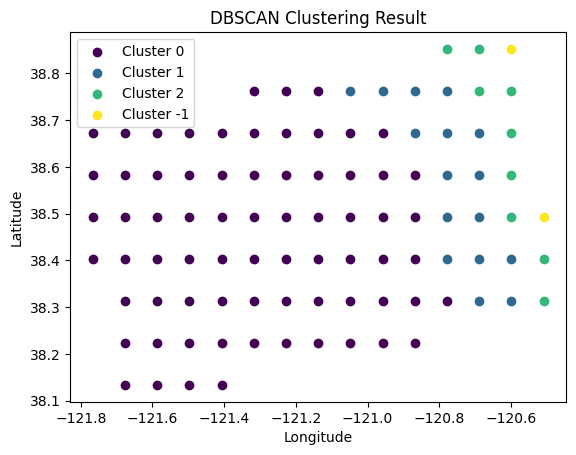

In [266]:
# Get unique cluster labels
unique_clusters = result['cluster'].unique()

# Define a color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(unique_clusters)))

# Create a scatter plot for each cluster
for cluster, color in zip(unique_clusters, colors):
    cluster_data = result[result['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}', c=[color])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering Result')
plt.legend()

plt.show()


In [267]:
import folium
import matplotlib.cm as cm

In [268]:
# Get unique cluster labels
unique_clusters = result['cluster'].unique()

# Create a color map with a unique color for each cluster
colors = cm.tab10(range(len(unique_clusters)))

# Create a Folium map centered around the average latitude and longitude
center_latitude = result['latitude'].mean()
center_longitude = result['longitude'].mean()
map = folium.Map(location=[center_latitude, center_longitude], zoom_start=10)

# Create a scatter plot for each cluster
for cluster, color in zip(unique_clusters, colors):
    cluster_data = result[result['cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        color_hex = '#%02x%02x%02x' % tuple(int(c * 255) for c in color[:3])
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color_hex,
            fill=True,
            fill_color=color_hex,
            fill_opacity=0.6,
            tooltip=f"Cluster {cluster}"
        ).add_to(map)

# Display the map
map

<ipython-input-269-ac7d1922ed4a>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['longitude'], cluster_data['latitude'], c=color, label=f'Cluster {cluster}')


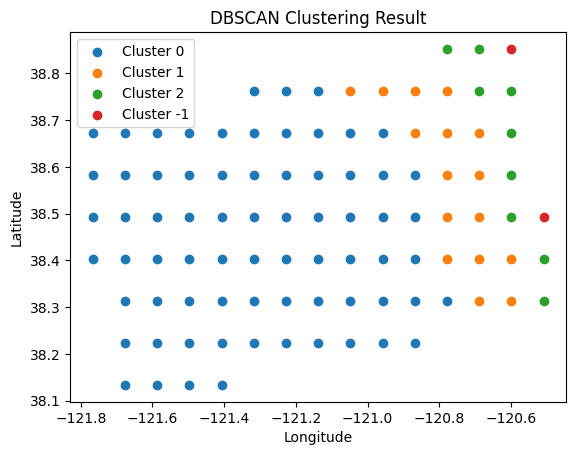

In [269]:
# Get unique cluster labels
unique_clusters = result['cluster'].unique()

# Create a color map with a unique color for each cluster
colors = cm.tab10(range(len(unique_clusters)))

# Create a scatter plot
fig, ax = plt.subplots()

# Plot each cluster
for cluster, color in zip(unique_clusters, colors):
    cluster_data = result[result['cluster'] == cluster]
    ax.scatter(cluster_data['longitude'], cluster_data['latitude'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('DBSCAN Clustering Result')
ax.legend()

# Display the plot
plt.show()

<ipython-input-270-7e5601ceb679>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['temperature_2m'], cluster_data['total_precipitation_sum'], c=color, label=f'Cluster {cluster}')


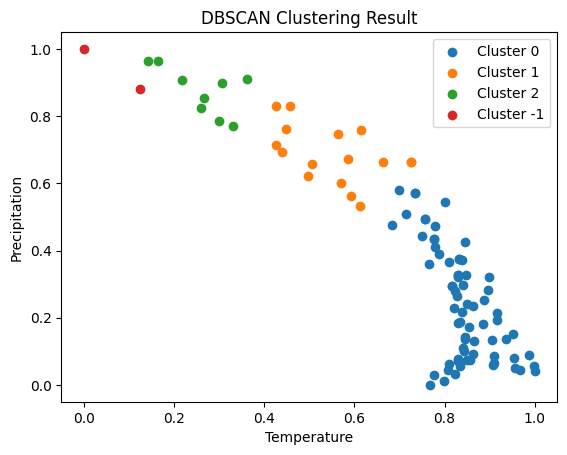

In [270]:
# Get unique cluster labels
unique_clusters = result['cluster'].unique()

# Create a color map with a unique color for each cluster
colors = cm.tab10(range(len(unique_clusters)))

# Create a scatter plot for precipitation and temperature
fig, ax = plt.subplots()

# Plot precipitation and temperature for each cluster
for cluster, color in zip(unique_clusters, colors):
    cluster_data = result[result['cluster'] == cluster]
    ax.scatter(cluster_data['temperature_2m'], cluster_data['total_precipitation_sum'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('Temperature')
ax.set_ylabel('Precipitation')
ax.set_title('DBSCAN Clustering Result')
ax.legend()

# Display the plot
plt.show()
